# Flight Parquet Multi-Year Exploration

Following `explore_year_parquet_plan.md`, this notebook loads all available Parquet files from `~/flight_data` and performs exploratory analysis across years.


In [1]:
from pathlib import Path
from typing import List

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")


## Load Parquet Files


In [3]:
data_dir = Path.home() / "flight_data"
parquet_paths = sorted(data_dir.glob("*.parquet"))

if not parquet_paths:
    raise FileNotFoundError(f"No Parquet files found in {data_dir}")

print("Discovered Parquet files:")
for path in parquet_paths:
    print(f"- {path.name}")

frames: List[pd.DataFrame] = []
for path in parquet_paths:
    df = pd.read_parquet(path)
    df = df.assign(YEAR=path.stem)
    frames.append(df)

flights_all = pd.concat(frames, ignore_index=True, copy=False)
print(f"\nCombined DataFrame shape: {flights_all.shape}")
flights_all.head()


Discovered Parquet files:
- 2009.parquet
- 2010.parquet
- 2011.parquet
- 2012.parquet
- 2013.parquet
- 2014.parquet
- 2015.parquet
- 2016.parquet
- 2017.parquet
- 2018.parquet

Combined DataFrame shape: (61556964, 29)


,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,...,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27,YEAR
0,2009-01-01,XE,1204,DCA,EWR,1100,1058.0,-2.0,18.0,1116.0,...,68.0,42.0,199.0,NaN,NaN,NaN,NaN,NaN,NaN,2009
1,2009-01-01,XE,1206,EWR,IAD,1510,1509.0,-1.0,28.0,1537.0,...,75.0,43.0,213.0,NaN,NaN,NaN,NaN,NaN,NaN,2009
2,2009-01-01,XE,1207,EWR,DCA,1100,1059.0,-1.0,20.0,1119.0,...,62.0,36.0,199.0,NaN,NaN,NaN,NaN,NaN,NaN,2009
3,2009-01-01,XE,1208,DCA,EWR,1240,1249.0,9.0,10.0,1259.0,...,56.0,37.0,199.0,NaN,NaN,NaN,NaN,NaN,NaN,2009
4,2009-01-01,XE,1209,IAD,EWR,1715,1705.0,-10.0,24.0,1729.0,...,77.0,40.0,213.0,NaN,NaN,NaN,NaN,NaN,NaN,2009


## Basic Statistics


In [4]:
row_count, column_count = flights_all.shape
print(f"Rows: {row_count:,}")
print(f"Columns: {column_count}")

print("\nColumns:")
print(", ".join(flights_all.columns))

print("\nDtypes:")
print(flights_all.dtypes.sort_index())


Rows: 61,556,964
Columns: 29

Columns:
FL_DATE, OP_CARRIER, OP_CARRIER_FL_NUM, ORIGIN, DEST, CRS_DEP_TIME, DEP_TIME, DEP_DELAY, TAXI_OUT, WHEELS_OFF, WHEELS_ON, TAXI_IN, CRS_ARR_TIME, ARR_TIME, ARR_DELAY, CANCELLED, CANCELLATION_CODE, DIVERTED, CRS_ELAPSED_TIME, ACTUAL_ELAPSED_TIME, AIR_TIME, DISTANCE, CARRIER_DELAY, WEATHER_DELAY, NAS_DELAY, SECURITY_DELAY, LATE_AIRCRAFT_DELAY, Unnamed: 27, YEAR

Dtypes:
ACTUAL_ELAPSED_TIME    float64
AIR_TIME               float64
ARR_DELAY              float64
ARR_TIME               float64
CANCELLATION_CODE       object
CANCELLED              float64
CARRIER_DELAY          float64
CRS_ARR_TIME             Int64
CRS_DEP_TIME             Int64
CRS_ELAPSED_TIME       float64
DEP_DELAY              float64
DEP_TIME               float64
DEST                    object
DISTANCE               float64
DIVERTED               float64
FL_DATE                 object
LATE_AIRCRAFT_DELAY    float64
NAS_DELAY              float64
OP_CARRIER              object
OP

In [5]:
numeric_summary = flights_all.describe().T
numeric_summary


,count,mean,std,min,25%,50%,75%,max
OP_CARRIER_FL_NUM,61556964.0,2300.241257,1886.557211,0.0,725.0,1741.0,3606.0,9855.0
CRS_DEP_TIME,61556963.0,1327.202589,474.893502,1.0,921.0,1320.0,1725.0,2359.0
DEP_TIME,60621241.0,1333.141072,487.487783,1.0,925.0,1327.0,1734.0,2400.0
DEP_DELAY,60616289.0,9.044879,37.137427,-251.0,-5.0,-2.0,7.0,2755.0
TAXI_OUT,60593063.0,15.991963,9.31189,0.0,10.0,14.0,19.0,458.0
WHEELS_OFF,60593068.0,1356.017721,488.836959,1.0,939.0,1340.0,1748.0,2400.0
WHEELS_ON,60559948.0,1473.756664,511.512451,1.0,1059.0,1509.0,1907.0,2400.0
TAXI_IN,60559949.0,7.118817,5.304306,0.0,4.0,6.0,8.0,414.0
CRS_ARR_TIME,61556962.0,1495.146887,495.78675,1.0,1113.0,1520.0,1913.0,2400.0
ARR_TIME,60559949.0,1479.336885,515.097029,1.0,1103.0,1513.0,1912.0,2400.0


In [6]:
categorical_columns = [
    col
    for col in ["YEAR", "OP_CARRIER", "ORIGIN", "DEST", "TAIL_NUM"]
    if col in flights_all.columns
]

categorical_summaries = {}
for column in categorical_columns:
    categorical_summaries[column] = flights_all[column].value_counts(dropna=False).head(10)

categorical_summaries


{'YEAR': 2018    7213446
 2010    6450117
 2009    6429338
 2013    6369482
 2012    6096762
 2011    6066650
 2014    5819811
 2015    5819079
 2017    5674621
 2016    5617658
 Name: YEAR, dtype: int64,
 'OP_CARRIER': WN    12096540
 DL     7841880
 AA     6682161
 OO     6263052
 UA     4826658
 EV     4726445
 MQ     3216260
 US     2657286
 B6     2483969
 AS     1660539
 Name: OP_CARRIER, dtype: int64,
 'ORIGIN': ATL    3903244
 ORD    3001285
 DFW    2546075
 DEN    2300550
 LAX    2133445
 PHX    1720614
 IAH    1672053
 SFO    1612933
 LAS    1472436
 CLT    1334522
 Name: ORIGIN, dtype: int64,
 'DEST': ATL    3903288
 ORD    3001372
 DFW    2546050
 DEN    2300456
 LAX    2133646
 PHX    1720588
 IAH    1672279
 SFO    1613144
 LAS    1472477
 CLT    1334543
 Name: DEST, dtype: int64}

## Value Distributions


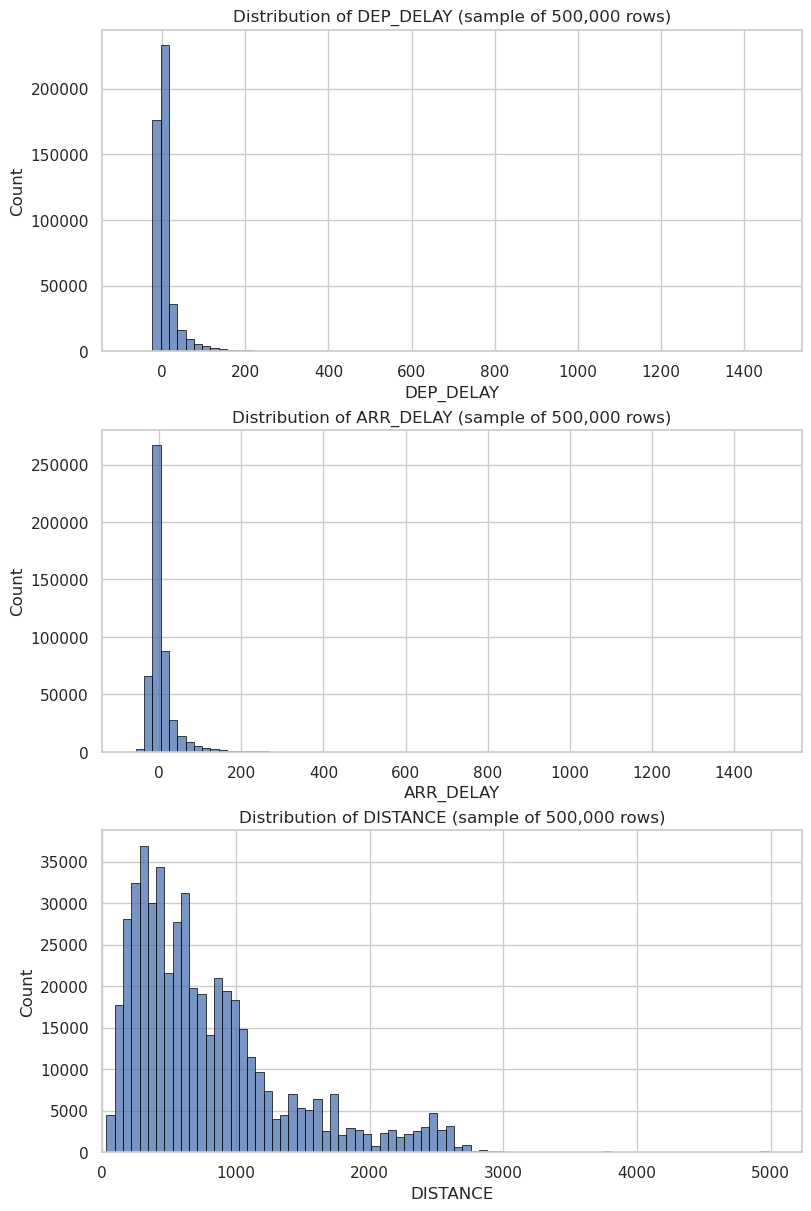

In [7]:
numeric_columns_for_hist = [col for col in ["DEP_DELAY", "ARR_DELAY", "DISTANCE"] if col in flights_all.columns]

sample_size = min(500_000, len(flights_all))
flights_sample = flights_all.sample(n=sample_size, random_state=42)

fig, axes = plt.subplots(len(numeric_columns_for_hist), 1, figsize=(8, 4 * len(numeric_columns_for_hist)), constrained_layout=True)
if len(numeric_columns_for_hist) == 1:
    axes = [axes]

for ax, column in zip(axes, numeric_columns_for_hist):
    sns.histplot(data=flights_sample, x=column, ax=ax, bins=80, kde=False, edgecolor="black")
    ax.set_title(f"Distribution of {column} (sample of {sample_size:,} rows)")
    ax.set_xlabel(column)
    ax.set_ylabel("Count")
    ax.set_xlim(left=min(0, flights_sample[column].min(skipna=True)))

plt.show()


## Missing Value Analysis


In [8]:
missing_counts = flights_all.isna().sum()
missing_percent = (missing_counts / len(flights_all)) * 100

missing_df = pd.DataFrame({
    "missing_count": missing_counts,
    "missing_percent": missing_percent,
})
missing_df = missing_df.sort_values(by="missing_percent", ascending=False)
missing_df


,missing_count,missing_percent
Unnamed: 27,61556964,100.000000
CANCELLATION_CODE,60583755,98.419011
NAS_DELAY,50166224,81.495611
LATE_AIRCRAFT_DELAY,50166224,81.495611
SECURITY_DELAY,50166224,81.495611
CARRIER_DELAY,50166224,81.495611
WEATHER_DELAY,50166224,81.495611
ARR_DELAY,1121351,1.821648
ACTUAL_ELAPSED_TIME,1118754,1.817429
AIR_TIME,1118753,1.817427


/tmp/ipykernel_1857902/3405205918.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


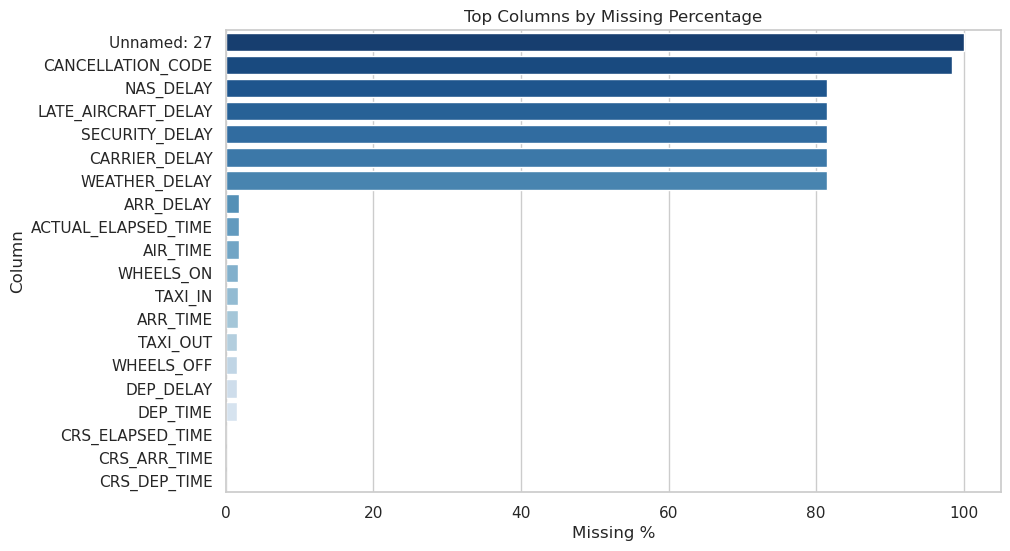

In [9]:
top_missing = missing_df[missing_df["missing_count"] > 0].head(20)

plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_missing.reset_index(),
    x="missing_percent",
    y="index",
    palette="Blues_r"
)
plt.title("Top Columns by Missing Percentage")
plt.xlabel("Missing %")
plt.ylabel("Column")
plt.show()


## Notes & Next Steps
- Review categorical summaries for notable route or carrier patterns.
- Dive deeper into delay distributions by airline or airport using groupby operations.
- Extend the analysis with year-over-year comparisons or integrate external datasets (e.g., weather) for richer insights.
